In [24]:
import numpy as np
import sep

In [25]:
# additional setup for reading the test image and displaying plots
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [26]:
# read image into standard 2-d numpy array
data = fits.getdata("image.fits")


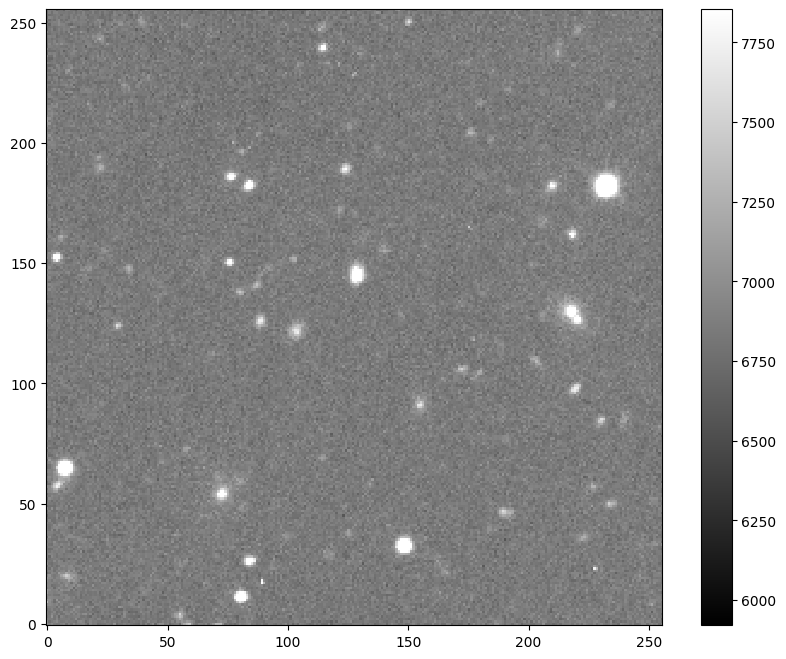

In [28]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("p1_image1.png")

In [29]:
# measure a spatially varying background on the image
threshold_value = m + 2 * s
mask = data > threshold_value
bkg = sep.Background(data)
bkg = sep.Background(data, mask=mask, bw=64, bh=64, fw=3, fh=3)

In [30]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

6851.89208984375
65.46174621582031


In [31]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

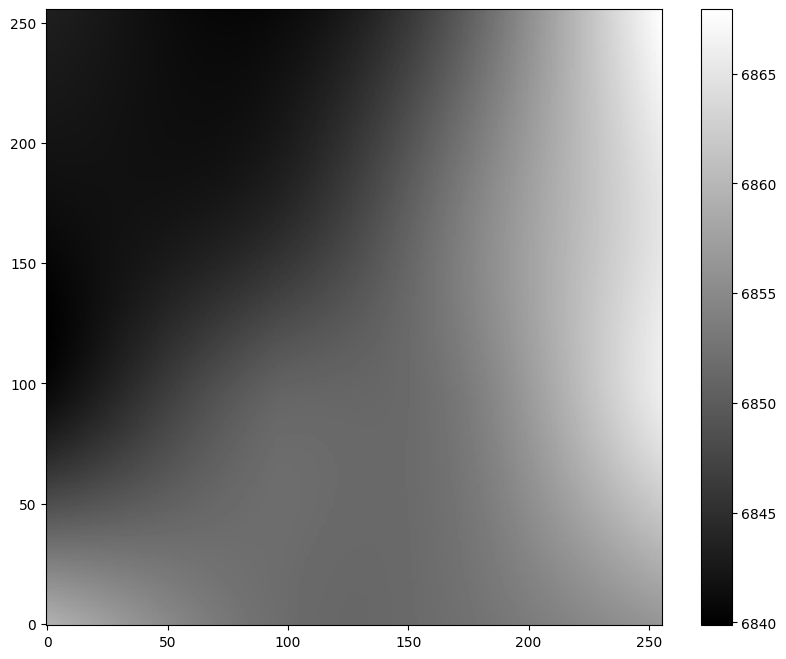

In [33]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("p1_image2.png")

In [34]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

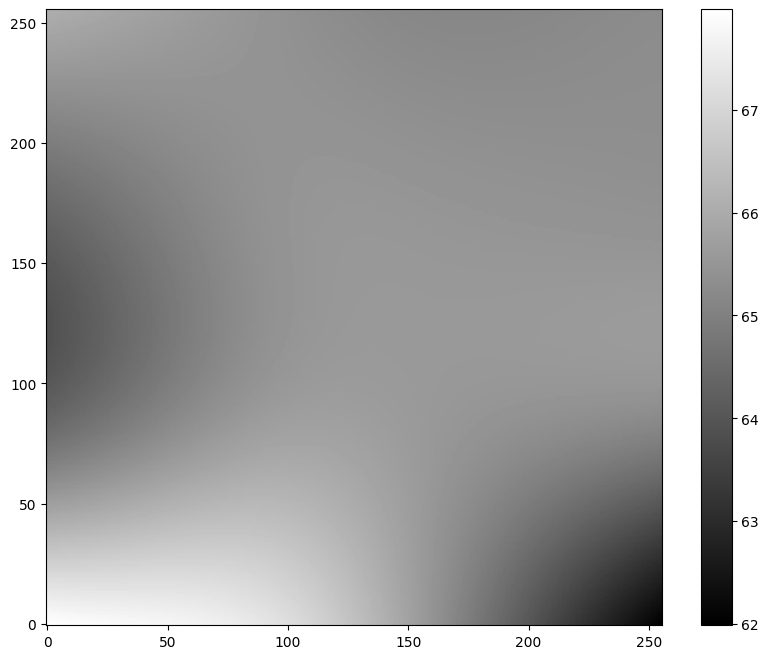

In [36]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("p1_image3.png")

In [37]:
# subtract the background
data_sub = data - bkg


In [38]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [39]:
# how many objects were detected
len(objects)

68

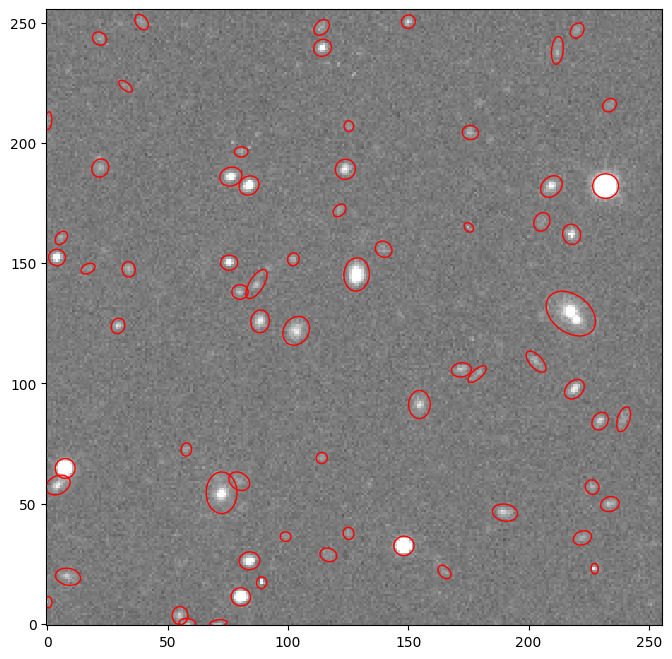

In [41]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    plt.savefig("p1_image4.png")

In [42]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [43]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [44]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2253.034590 +/- 291.034460
object 1: flux = 3095.457207 +/- 291.597755
object 2: flux = 5954.384238 +/- 356.568336
object 3: flux = 1852.076699 +/- 295.029918
object 4: flux = 72742.024824 +/- 440.178610
object 5: flux = 3866.247480 +/- 352.170958
object 6: flux = 6421.245098 +/- 357.462234
object 7: flux = 2210.303906 +/- 350.790648
object 8: flux = 2746.691094 +/- 352.284962
object 9: flux = 20921.632070 +/- 376.972447
